In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2023-04-06_Sistema_E-Saude_Medicos_-_Base_de_Dados.csv', sep=';', encoding='ANSI')

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_4868\1304740188.py:1: DtypeWarning: Columns (9,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2023-04-06_Sistema_E-Saude_Medicos_-_Base_de_Dados.csv', sep=';', encoding='ANSI')


In [3]:
df.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
0,01/03/2022 00:25:49,13/05/2010 00:00:00,F,2,UPA,2639548,UPA CAMPO COMPRIDO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,OUTROS,OUTROS,OUTROS,CURITIBA,CRISTO REI,Brasileira,7941333,1,1,93853
1,01/03/2022 02:14:19,25/06/2021 00:00:00,M,2,UPA,2639548,UPA CAMPO COMPRIDO,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CIDADE INDUSTRIAL,Brasileira,11127812,1,1,93853
2,01/03/2022 02:57:48,28/08/2019 00:00:00,M,2,UPA,17396,UPA BOA VISTA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225170,...,NAO PARTICIPA,OUTROS,OUTROS,CURITIBA,ABRANCHES,Brasileira,10354061,1,1,107433
3,01/03/2022 00:58:04,07/06/2020 00:00:00,M,2,UPA,3827836,UPA PINHEIRINHO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,CIDADE INDUSTRIAL,Brasileira,10661286,1,2,112409
4,01/03/2022 01:23:03,25/05/1952 00:00:00,M,2,UPA,5323436,UPA CAJURU,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CAPAO DA IMBUIA,Brasileira,5072566,1,1,98666


In [4]:
#Separar a coluna de datas
df['Data do Atendimento'] = pd.to_datetime(df['Data do Atendimento'], format='%d/%m/%Y %H:%M:%S')
df['Data Atendimento'] = df['Data do Atendimento'].dt.date
df['Hora Atendimento'] = df['Data do Atendimento'].dt.time

In [5]:
df.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional,Data Atendimento,Hora Atendimento
0,2022-03-01 00:25:49,13/05/2010 00:00:00,F,2,UPA,2639548,UPA CAMPO COMPRIDO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,OUTROS,CURITIBA,CRISTO REI,Brasileira,7941333,1,1,93853,2022-03-01,00:25:49
1,2022-03-01 02:14:19,25/06/2021 00:00:00,M,2,UPA,2639548,UPA CAMPO COMPRIDO,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,ONIBUS,CURITIBA,CIDADE INDUSTRIAL,Brasileira,11127812,1,1,93853,2022-03-01,02:14:19
2,2022-03-01 02:57:48,28/08/2019 00:00:00,M,2,UPA,17396,UPA BOA VISTA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225170,...,OUTROS,CURITIBA,ABRANCHES,Brasileira,10354061,1,1,107433,2022-03-01,02:57:48
3,2022-03-01 00:58:04,07/06/2020 00:00:00,M,2,UPA,3827836,UPA PINHEIRINHO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,"ONIBUS,CARRO",CURITIBA,CIDADE INDUSTRIAL,Brasileira,10661286,1,2,112409,2022-03-01,00:58:04
4,2022-03-01 01:23:03,25/05/1952 00:00:00,M,2,UPA,5323436,UPA CAJURU,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,ONIBUS,CURITIBA,CAPAO DA IMBUIA,Brasileira,5072566,1,1,98666,2022-03-01,01:23:03


In [5]:
# Transformando idade dos pacientes
# Converter a coluna "Data de Nascimento" em objeto datetime
df['Data de Nascimento'] = df['Data de Nascimento'].astype(str)
df['Data de Nascimento'] = df['Data de Nascimento'].str.slice(stop=10) #pega os primeiros 10 caracteres - ignorando as horas
df['Data de Nascimento'] = pd.to_datetime(df['Data de Nascimento'], format='%d/%m/%Y')

# Calcular a idade dos pacientes em anos
agora = datetime.now()
df['Idade'] = (agora - df['Data de Nascimento']).astype('<m8[Y]')


In [6]:
df.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional,Idade
0,01/03/2022 00:25:49,2010-05-13,F,2,UPA,2639548,UPA CAMPO COMPRIDO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,OUTROS,OUTROS,CURITIBA,CRISTO REI,Brasileira,7941333,1,1,93853,12.0
1,01/03/2022 02:14:19,2021-06-25,M,2,UPA,2639548,UPA CAMPO COMPRIDO,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CIDADE INDUSTRIAL,Brasileira,11127812,1,1,93853,1.0
2,01/03/2022 02:57:48,2019-08-28,M,2,UPA,17396,UPA BOA VISTA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225170,...,OUTROS,OUTROS,CURITIBA,ABRANCHES,Brasileira,10354061,1,1,107433,3.0
3,01/03/2022 00:58:04,2020-06-07,M,2,UPA,3827836,UPA PINHEIRINHO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,CIDADE INDUSTRIAL,Brasileira,10661286,1,2,112409,2.0
4,01/03/2022 01:23:03,1952-05-25,M,2,UPA,5323436,UPA CAJURU,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CAPAO DA IMBUIA,Brasileira,5072566,1,1,98666,70.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039649 entries, 0 to 1039648
Data columns (total 43 columns):
 #   Column                                        Non-Null Count    Dtype         
---  ------                                        --------------    -----         
 0   Data do Atendimento                           1039649 non-null  object        
 1   Data de Nascimento                            1039649 non-null  datetime64[ns]
 2   Sexo                                          1039649 non-null  object        
 3   Código do Tipo de Unidade                     1039649 non-null  int64         
 4   Tipo de Unidade                               1039649 non-null  object        
 5   Código da Unidade                             1039649 non-null  int64         
 6   Descrição da Unidade                          1039649 non-null  object        
 7   Código do Procedimento                        1039649 non-null  int64         
 8   Descrição do Procedimento                 

In [8]:
df_limpo = df[['Sexo', 'Tipo de Unidade', 'Descrição da Unidade', 'Descrição do Procedimento', 
               'Descrição do CBO', 'Código do CID', 'Descrição do CID', 
               'Encaminhamento para Atendimento Especialista', 'Área de Atuação', 
               'Desencadeou Internamento', 'CID do Internamento']]

In [9]:
print(df['Tipo de Unidade'].unique())

['UPA' 'SIACE' 'BASICO']


In [10]:
# Selecionando apenas as linhas com Tipo de Unidade igual a "UPA"
df_upa = df.loc[df['Tipo de Unidade'] == 'UPA']

# Selecionando apenas as linhas com Tipo de Unidade igual a "BASICO"
df_basico = df.loc[df['Tipo de Unidade'] == 'BASICO']

In [11]:
df_upa.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional,Idade
0,01/03/2022 00:25:49,2010-05-13,F,2,UPA,2639548,UPA CAMPO COMPRIDO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,OUTROS,OUTROS,CURITIBA,CRISTO REI,Brasileira,7941333,1,1,93853,12.0
1,01/03/2022 02:14:19,2021-06-25,M,2,UPA,2639548,UPA CAMPO COMPRIDO,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CIDADE INDUSTRIAL,Brasileira,11127812,1,1,93853,1.0
2,01/03/2022 02:57:48,2019-08-28,M,2,UPA,17396,UPA BOA VISTA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225170,...,OUTROS,OUTROS,CURITIBA,ABRANCHES,Brasileira,10354061,1,1,107433,3.0
3,01/03/2022 00:58:04,2020-06-07,M,2,UPA,3827836,UPA PINHEIRINHO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,CIDADE INDUSTRIAL,Brasileira,10661286,1,2,112409,2.0
4,01/03/2022 01:23:03,1952-05-25,M,2,UPA,5323436,UPA CAJURU,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CAPAO DA IMBUIA,Brasileira,5072566,1,1,98666,70.0


In [12]:
df_basico.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional,Idade
194,01/03/2022 15:13:37,1996-06-22,F,1,BASICO,5406617,UMS VILA SANDRA PSF,301010064,CONSULTA MEDICA EM ATENCAO PRIMARIA,225142,...,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,CIDADE INDUSTRIAL,Brasileira,9082351,1,1,11701,26.0
196,01/03/2022 14:54:29,1977-03-12,F,1,BASICO,5406617,UMS VILA SANDRA PSF,301010064,CONSULTA MEDICA EM ATENCAO PRIMARIA,225142,...,NaN,NaN,CURITIBA,CIDADE INDUSTRIAL,Brasileira,9259725,1,1,11701,46.0
202,01/03/2022 15:55:45,2013-07-04,M,1,BASICO,3912698,UMS MAE CURITIBANA,301010064,CONSULTA MEDICA EM ATENCAO PRIMARIA,225124,...,"TELEVISAO,RADIO",ONIBUS,CURITIBA,REBOUCAS,Brasileira,8889342,1,1,85386,9.0
203,01/03/2022 08:06:05,2021-06-23,M,1,BASICO,3912698,UMS MAE CURITIBANA,301010064,CONSULTA MEDICA EM ATENCAO PRIMARIA,225124,...,"TELEVISAO,RADIO,OUTROS",ONIBUS,CURITIBA,ALTO DA RUA XV,Brasileira,11133753,1,1,85386,1.0
205,01/03/2022 08:31:19,2013-10-24,M,1,BASICO,16993,UMS SAO JOAO DEL REY PSF,301010064,CONSULTA MEDICA EM ATENCAO PRIMARIA,225124,...,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,SITIO CERCADO,Brasileira,8886376,1,1,44950,9.0


## Dataframe com UPA's

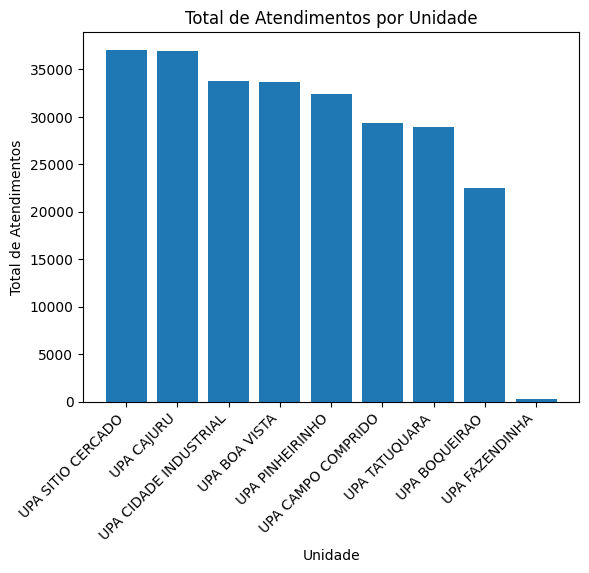

In [13]:
# Contagem de atendimentos por unidade
upas_por_unidade = df_upa.groupby(['Descrição da Unidade']).size().reset_index(name='Total de Atendimentos')
upas_por_unidade = upas_por_unidade.sort_values('Total de Atendimentos', ascending=False)[:10]

# Gerando o gráfico de barras
plt.bar(upas_por_unidade['Descrição da Unidade'], upas_por_unidade['Total de Atendimentos'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Unidade')
plt.ylabel('Total de Atendimentos')
plt.title('Total de Atendimentos por Unidade')
plt.show()

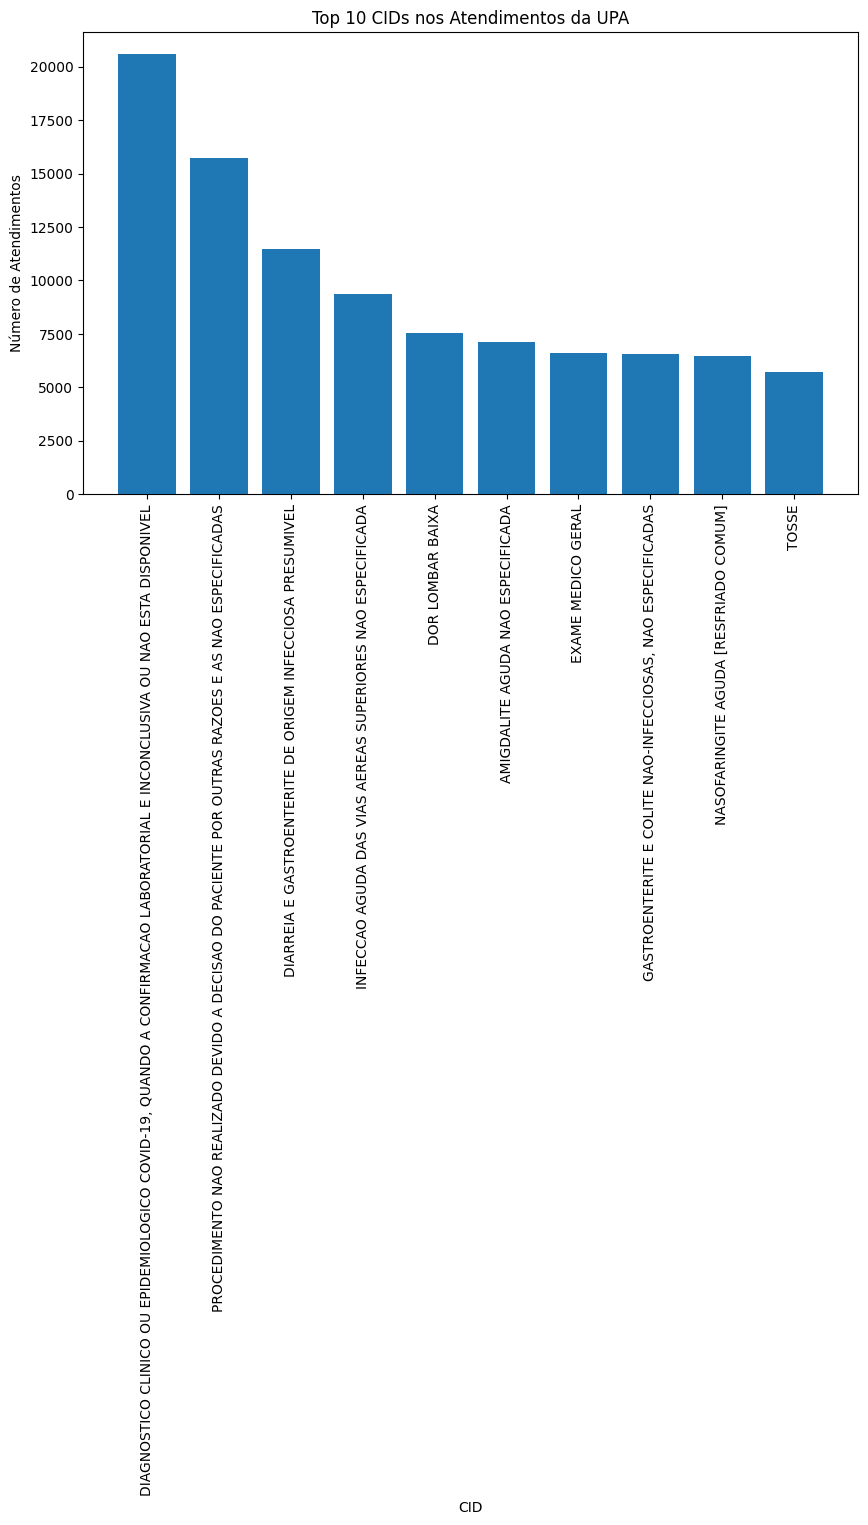

In [14]:
# Selecionar os 10 principais CIDs
top_cids = df_upa['Descrição do CID'].value_counts().nlargest(10)

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_cids.index, top_cids.values)

# Personalizar o gráfico
ax.set_title('Top 10 CIDs nos Atendimentos da UPA')
ax.set_xlabel('CID')
ax.set_ylabel('Número de Atendimentos')
ax.tick_params(axis='x', rotation=90)

plt.show()

In [15]:
# Calcular o número de atendimentos que desencadearam em internamentos
num_internamentos = df_upa[df_upa['Desencadeou Internamento'] == 'Sim'].shape[0]

# Calcular o número total de atendimentos
num_atendimentos = df.shape[0]

# Calcular a porcentagem de atendimentos que desencadearam em internamentos
porcentagem_internamentos = num_internamentos / num_atendimentos * 100

print(f'% de atendimentos que desencadearam em internamentos: {porcentagem_internamentos:.2f}%')

% de atendimentos que desencadearam em internamentos: 0.41%


In [16]:
# Filtrar os atendimentos que desencadearam internamento
internamentos = df_upa[df_upa['Desencadeou Internamento'] == 'Sim']

# Contar o número de ocorrências de cada CID de internamento
top_cids_internamentos = internamentos.groupby(['CID do Internamento']).size().reset_index(name='Total')

# Ordenar do maior para o menor
top_cids_internamentos = top_cids_internamentos.sort_values('Total', ascending=False)

# Selecionar os 10 primeiros resultados
top_cids_internamentos = top_cids_internamentos.head(10)

print("Principais CID's dos Internamentos:\n", top_cids_internamentos)

Principais CID's dos Internamentos:
     CID do Internamento  Total
213                J189    282
385                N390    208
255                K359    147
430                R104    127
427                R100    122
210                J180    118
228                J441    102
503                U071     99
163                I500     98
167                 I64     97


## Dataframe Unidades Basicas


In [17]:
basico_por_unidade = df_basico.groupby(['Descrição da Unidade']).size().reset_index(name='Total de Atendimentos')
print('Total de Atendimentos por Unidade:\n', basico_por_unidade)

Total de Atendimentos por Unidade:
            Descrição da Unidade  Total de Atendimentos
0                    UMS ABAETE                   5417
1                 UMS ABRANCHES                   5247
2              UMS ALVORADA PSF                   6089
3                    UMS ATENAS                   6761
4                     UMS ATUBA                   7203
..                          ...                    ...
103            UMS VISTA ALEGRE                   8489
104       UMS VITORIA REGIA PSF                   6798
105  UMS WALDEMAR MONASTIER PSF                   5606
106            UMS XAPINHAL PSF                   6469
107                   UMS XAXIM                   5750

[108 rows x 2 columns]


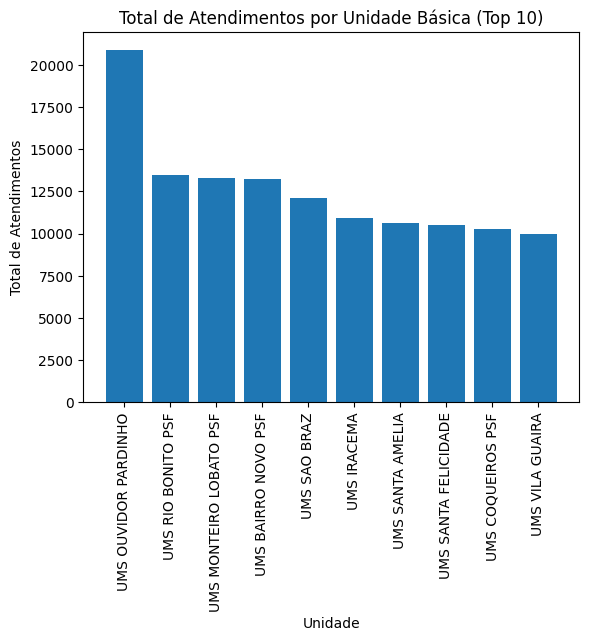

In [18]:
# Filtrar as 10 unidades com mais atendimentos
top_10_unidades = df_basico.groupby(['Descrição da Unidade']).size().reset_index(name='Total de Atendimentos') \
                   .sort_values('Total de Atendimentos', ascending=False).head(10)

# Criar o gráfico de barras verticais
plt.bar(top_10_unidades['Descrição da Unidade'], top_10_unidades['Total de Atendimentos'])
plt.xticks(rotation=90)
plt.xlabel('Unidade')
plt.ylabel('Total de Atendimentos')
plt.title('Total de Atendimentos por Unidade Básica (Top 10)')
plt.show()

In [19]:
#Total de atendimentos por procedimentos
basico_por_procedimento = df_basico.groupby(['Descrição do Procedimento']).size().reset_index(name='Total de Atendimentos')
print('Total de Atendimentos por Procedimento:\n', basico_por_procedimento)


Total de Atendimentos por Procedimento:
                             Descrição do Procedimento  Total de Atendimentos
0   ABORDAGEM COGNITIVA COMPORTAMENTAL DO FUMANTE ...                     12
1   ASSISTENCIA DOMICILIAR POR EQUIPE MULTIPROFISS...                     78
2   ATENDIMENTO DE ADOLESCENTES EM CUMPRIMENTO DE ...                      3
3           ATENDIMENTO DE URGENCIA EM ATENCAO BASICA                   1971
4   ATENDIMENTO DE URGENCIA EM ATENCAO PRIMARIA CO...                    287
5   ATENDIMENTO DE URGENCIA EM ATENCAO PRIMARIA CO...                     70
6         ATENDIMENTO DE URGENCIA EM PEQUENO QUEIMADO                      1
7                            AVALIACAO ANTROPOMETRICA                    204
8   AVALIACAO DO DESENVOLVIMENTO DA CRIANCA NA PUE...                  11829
9            AVALIACAO DO ESTAGIO DE MATURACAO SEXUAL                     14
10         AVALIACAO MULTIDIMENSIONAL DA PESSOA IDOSA                     14
11  CONSULTA AO PACIENTE CURADO DE 

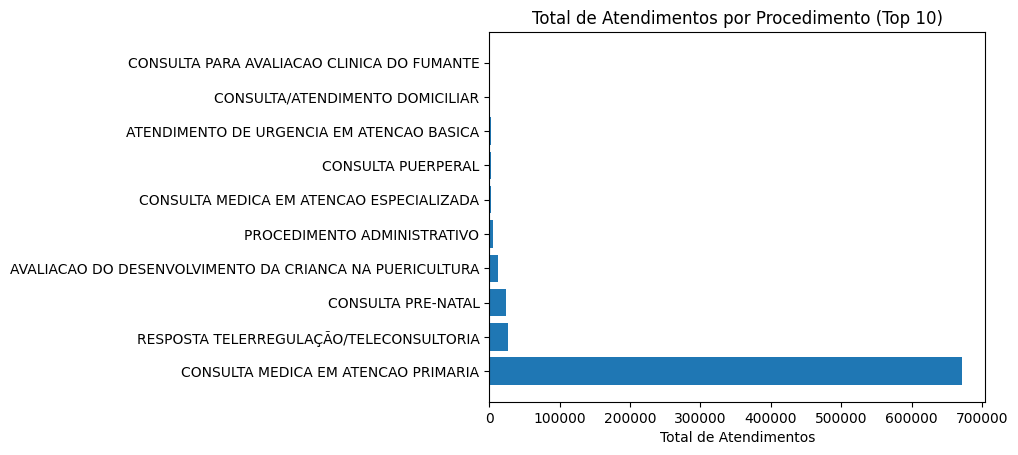

In [20]:
# Selecionar as 10 procedimentos mais frequentes
top_procedimentos = df_basico['Descrição do Procedimento'].value_counts().nlargest(10)

# Criar um gráfico de barras horizontais
plt.barh(top_procedimentos.index, top_procedimentos.values)
plt.xlabel('Total de Atendimentos')
plt.title('Total de Atendimentos por Procedimento (Top 10)')
plt.show()

In [23]:
#Principais CID's (top10)
basico_top10_cid = df_basico.groupby(['Descrição do CID']).size().reset_index(name='Total de Atendimentos')
basico_top10_cid = basico_top10_cid.sort_values('Total de Atendimentos', ascending=False).head(10)
print('Principais CIDs (top 10):\n', basico_top10_cid)

Principais CIDs (top 10):
                                        Descrição do CID  Total de Atendimentos
1448                                 EXAME MEDICO GERAL                 136716
1213                 EMISSAO DE PRESCRICAO DE REPETICAO                  57693
1392                EXAME DE ROTINA DE SAUDE DA CRIANCA                  32636
1842                   HIPERTENSAO ESSENCIAL (PRIMARIA)                  28901
916   DIAGNOSTICO CLINICO OU EPIDEMIOLOGICO COVID-19...                  20948
1987  INFECCAO AGUDA DAS VIAS AEREAS SUPERIORES NAO ...                  16639
1449  EXAME NAO ESPECIFICADO COM FINALIDADES ADMINIS...                  14705
2346              NASOFARINGITE AGUDA [RESFRIADO COMUM]                  14381
3928    SUPERVISAO DE GRAVIDEZ NORMAL, NAO ESPECIFICADA                  12749
1447             EXAME GINECOLOGICO (GERAL) (DE ROTINA)                  10825


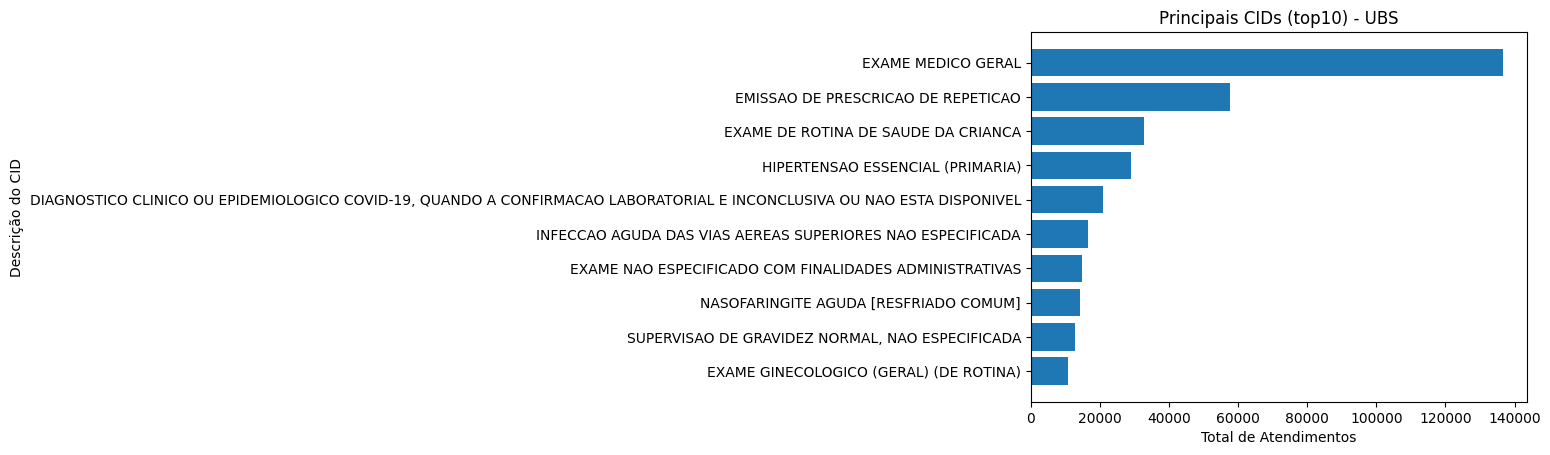

In [24]:
top10_cids = df_basico['Descrição do CID'].value_counts().nlargest(10)

plt.barh(top10_cids.index, top10_cids.values)
plt.gca().invert_yaxis()
plt.title('Principais CIDs (top10) - UBS')
plt.xlabel('Total de Atendimentos')
plt.ylabel('Descrição do CID')
plt.show()

In [25]:
#Verificar % de encaminhamento a especialistas
basico_encaminhados_especialistas = df_basico['Encaminhamento para Atendimento Especialista'].value_counts(normalize=True) * 100
print('% de Atendimentos Encaminhados a Especialistas:\n', basico_encaminhados_especialistas)

% de Atendimentos Encaminhados a Especialistas:
 Nao    78.564027
Sim    21.435973
Name: Encaminhamento para Atendimento Especialista, dtype: float64


In [26]:
# Verificar quais são os principais especialistas
areas_atuacao = df_basico.groupby(['Área de Atuação']).size().reset_index(name='Total de Atendimentos')
areas_atuacao = areas_atuacao.sort_values(by=['Total de Atendimentos'], ascending=False)
areas_atuacao['% de Atendimentos'] = (areas_atuacao['Total de Atendimentos'] / areas_atuacao['Total de Atendimentos'].sum()) * 100
print('Áreas de Atuação mais comuns:\n', areas_atuacao.head(10))

Áreas de Atuação mais comuns:
                              Área de Atuação  Total de Atendimentos  \
96                        OFTALMOLOGIA GERAL                  10563   
32               AVALIAÇÃO PSICOLOGIA - NASF                   9026   
50                        DERMATOLOGIA GERAL                   6430   
101               OTORRINOLARINGOLOGIA GERAL                   6291   
14                     AVALIAÇÃO CARDIOLOGIA                   5943   
28              AVALIAÇÃO MUSCULOESQUELÉTICA                   5885   
20               AVALIAÇÃO GASTROENTEROLOGIA                   5428   
37   AVALIAÇÃO ULTRASSONOGRAFIA TRANSVAGINAL                   4473   
42                            CIRURGIA GERAL                   3796   
38                        AVALIAÇÃO UROLOGIA                   3555   

     % de Atendimentos  
96            9.838860  
32            8.407228  
50            5.989195  
101           5.859724  
14            5.535581  
28            5.481557  
20          

In [27]:
# % de atendimentos em UBS que viram internamentos
basico_internamentos = (df_basico['Desencadeou Internamento'].value_counts(normalize=True) * 100).to_frame(name='% de Atendimentos que Desencadearam Internamentos')
print('% de Atendimentos que Desencadearam Internamentos:\n', basico_internamentos)

% de Atendimentos que Desencadearam Internamentos:
      % de Atendimentos que Desencadearam Internamentos
Nao                                          99.999331
Sim                                           0.000669


In [28]:
# Cids dos internamentos
basico_internamentos_cid = df_basico[df_basico['Desencadeou Internamento'] == 'Sim']['CID do Internamento'].value_counts().reset_index(name='Total de Internamentos')
basico_internamentos_cid = basico_internamentos_cid.rename(columns={'index': 'CID'})
basico_internamentos_cid = basico_internamentos_cid.sort_values('Total de Internamentos', ascending=False).head(10)
print('Principais CIDs dos Internamentos:\n', basico_internamentos_cid)

Principais CIDs dos Internamentos:
     CID  Total de Internamentos
0  F200                       5
